In [1]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2) # 2 qubits, 2 classical bits
# currently : 0,0
circuit.x(0)  # apply X gate to qubit 0
# now : 1,0
circuit.cx(0,1) # cnot . Flips 2nd qubit if 1st qubit is 1
# now : 1,1
circuit.measure([0,1],[0,1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

/home/ubuntu/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


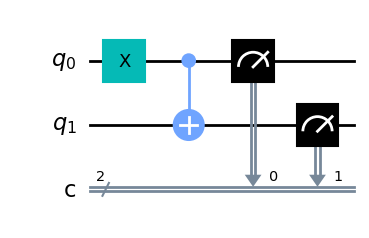

In [2]:
circuit.draw(output="mpl")

In [3]:
from qiskit import IBMQ
IBMQ.save_account(open("token.key","r").read())

/tmp/ipykernel_70185/1726308053.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(open("token.key","r").read())
/tmp/ipykernel_70185/1726308053.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(open("token.key","r").read())
configrc.store_credentials:WARNING:2024-05-15 14:56:58,584: Credentials already present. Set overwrite=True

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 3 queued and simulated qubits
simulator_statevector has 3 queued and simulated qubits
simulator_mps has 3 queued and simulated qubits
simulator_extended_stabilizer has 3 queued and simulated qubits
simulator_stabilizer has 3 queued and simulated qubits
ibm_sherbrooke has 69 queued and 127 qubits
ibm_brisbane has 24 queued and 127 qubits
ibm_kyoto has 6 queued and 127 qubits
ibm_osaka has 4 queued and 127 qubits


In [7]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend("ibm_osaka")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


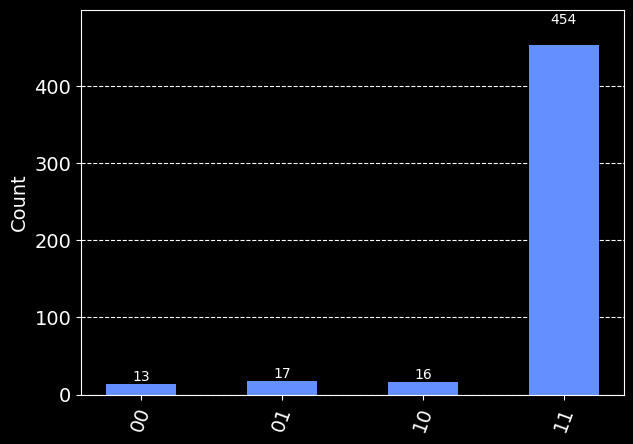

In [8]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [18]:
backend = provider.get_backend("ibm_osaka")


circuit = q.QuantumCircuit(2,2) # 2 qubits, 2 classical bits
# currently : 0,0
circuit.h(0)  # apply H gate to qubit 0
circuit.cx(0,1) # cnot . Flips 2nd qubit if 1st qubit is 1
circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [19]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

IBMQBackendApiError: 'Error submitting job: "(\'Connection aborted.\', RemoteDisconnected(\'Remote end closed connection without response\'))"'

In [10]:
from qiskit import Aer #simulator framework for qiskit

sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)

AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


Job Status: job has successfully run


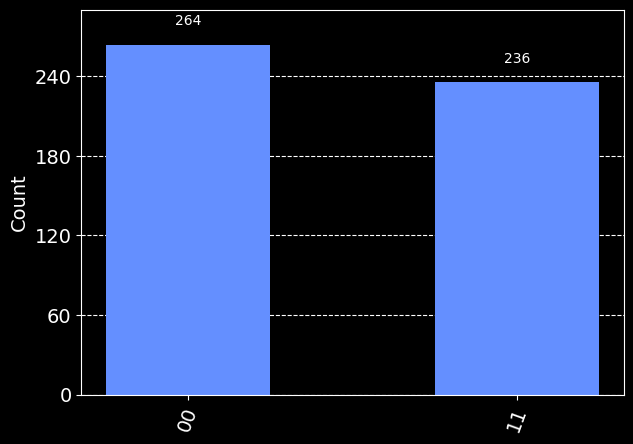

In [14]:
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])